In [ ]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files

# Upload the image
uploaded = files.upload()

# Extract the filename from the uploaded files
image_path = list(uploaded.keys())[0]


Saving Chris.jpg to Chris.jpg


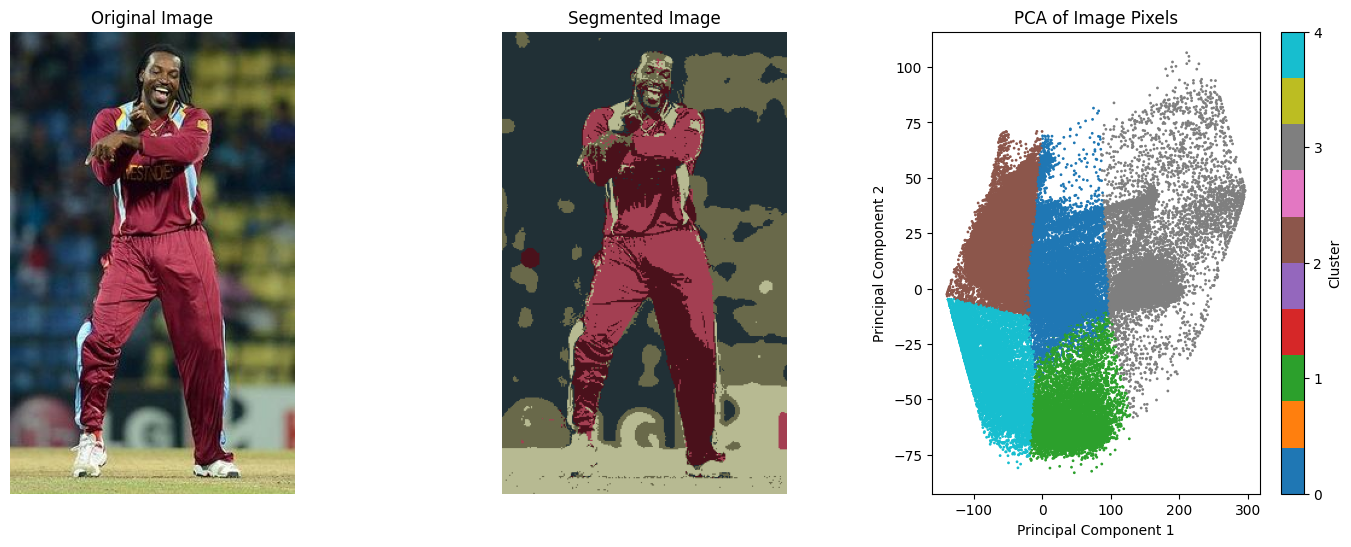

Done


In [ ]:
# Function to perform K-means clustering on image pixels and plot PCA
def kmeans_on_image(image_path, cluster_n):
    # Load the image
    img = cv.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Convert the image to RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Perform K-means clustering
    term_crit = (cv.TERM_CRITERIA_EPS, 30, 0.1)
    _, labels, centers = cv.kmeans(pixel_values, cluster_n, None, term_crit, 10, cv.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8
    centers = np.uint8(centers)

    # Map the labels to center colors
    segmented_img = centers[labels.flatten()]

    # Reshape segmented image to original dimensions
    segmented_img = segmented_img.reshape(img_rgb.shape)

    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    pixel_values_pca = pca.fit_transform(pixel_values)

    # Create a scatter plot for PCA
    plt.figure(figsize=(18, 6))

    # Plot the original and segmented images
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(segmented_img)
    plt.title('Segmented Image')
    plt.axis('off')

    # Plot PCA results
    plt.subplot(1, 3, 3)
    scatter = plt.scatter(pixel_values_pca[:, 0], pixel_values_pca[:, 1], c=labels.flatten(), cmap='tab10', s=1)
    plt.colorbar(scatter, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of Image Pixels')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.show()

    print('Done')

# Number of clusters
cluster_n = 5
kmeans_on_image(image_path, cluster_n)
#google colab

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import cv2
import IPython
from IPython.display import display, clear_output
import ipywidgets as widgets

# Step 1: Upload the image
uploaded = files.upload()

# Step 2: Load the uploaded image
# Assuming only one image is uploaded and we access the file name
image_path = next(iter(uploaded))
image = cv2.imread(image_path)


Saving Chris.jpg to Chris (1).jpg


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Button(description='Change Colors', style=ButtonStyle())

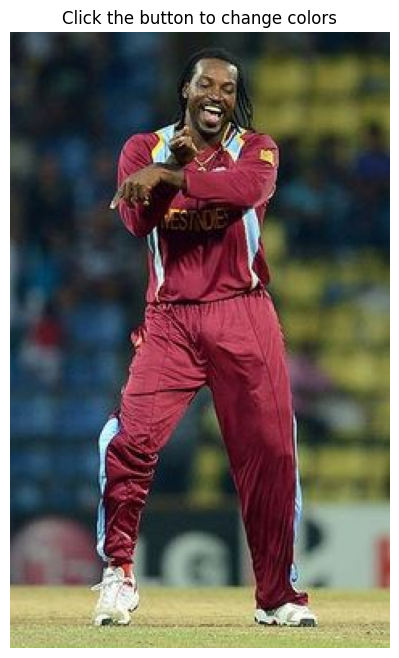

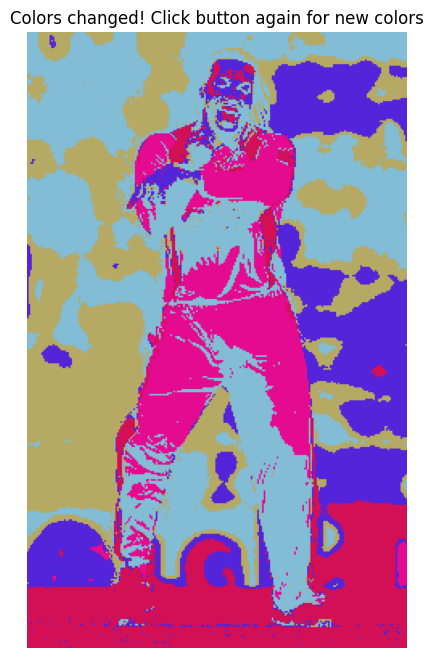

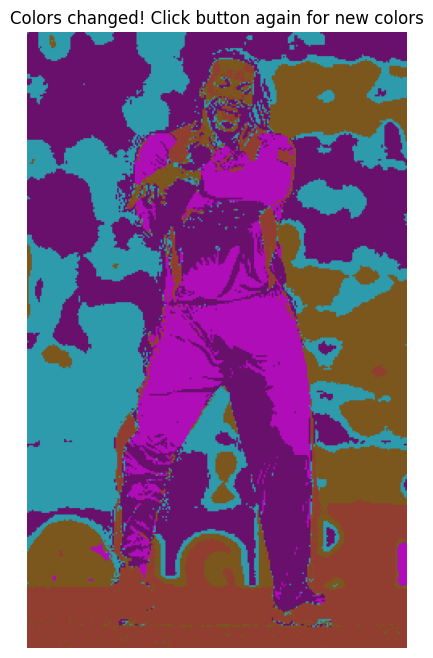

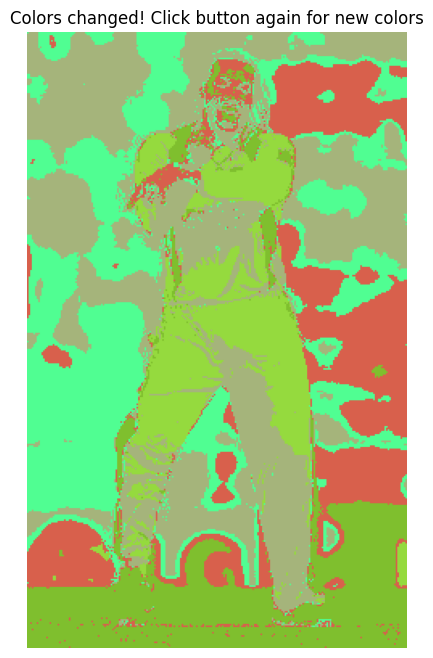

In [ ]:

# Convert image from BGR (OpenCV default) to RGB for proper display in matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Reshape the image into a 2D array of pixel values
rows, cols, channels = image.shape
pixels = image.reshape(rows * cols, channels).astype(float)

# Step 4: Define the number of clusters (K)
num_clusters = 5  # You can change this to any desired number of clusters

# Step 5: Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, max_iter=200, random_state=42)
cluster_idx = kmeans.fit_predict(pixels)
cluster_centers = kmeans.cluster_centers_

# Function to update the image with new random colors
def update_image():
    random_colors = np.random.randint(0, 255, (num_clusters, 3))

    recolored_pixels = np.zeros_like(pixels)
    for i in range(num_clusters):
        recolored_pixels[cluster_idx == i, :] = random_colors[i, :]

    # Reshape back into image dimensions
    recolored_image = recolored_pixels.reshape(rows, cols, channels).astype(np.uint8)

    # Display the updated image
    plt.figure(figsize=(10, 8))
    plt.imshow(recolored_image)
    plt.title('Colors changed! Click button again for new colors')
    plt.axis('off')
    plt.show()

# Create a button widget
button = widgets.Button(description="Change Colors")

# Define the button click event handler
def on_button_click(b):
    update_image()

# Assign the click event handler to the button
button.on_click(on_button_click)

# Display the button
display(button)

# Initially display the original image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('Click the button to change colors')
plt.axis('off')
plt.show()

Saving Chris.jpg to Chris (1).jpg


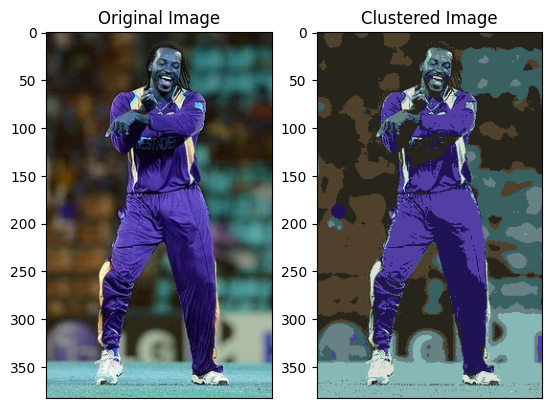

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Step 2: Load the uploaded image
# Assuming only one image is uploaded and we access the file name
image_path = next(iter(uploaded))
img = cv2.imread(image_path)

Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.subplot(1,2,1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]),
plt.subplot(1,2,2),plt.imshow(res2)
plt.title('Clustered Image'),plt.xticks([]),
plt.show()

# New Section